### Google Authentication

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Storing the dataset

In [ ]:
downloaded = drive.CreateFile({'id':'1XCRO-Y7GiKkFTCUKUWRV-sYdbCeLt6TK'}) 
downloaded.GetContentFile('data.csv') 

In [ ]:
#!pip install pygal

In [ ]:
#!pip install cufflinks

In [ ]:
#!pip install aif360

### Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import json
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.palettes import Viridis5
import seaborn as sns
import matplotlib.pyplot as plt
import pygal
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report

from aif360.datasets import BinaryLabelDataset
from IPython.display import Markdown, display

from IPython.display import SVG, display
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#storing data in a dataframe
df_data = pd.read_csv('data.csv')
df_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
columns = ['DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
        'Over18', 'RelationshipSatisfaction', 'StandardHours']
df_data.drop(columns, inplace=True, axis=1)

In [ ]:
df_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df_data.describe(include = 'all')

,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.607483,1.260544,8.192517,1.912925,1.721769,0.600000,1.729932,4.458503,1.728571,1.097279,...,0.153741,0.793878,11.278231,2.799320,1.761224,6.991156,4.229252,2.187755,4.123129,0.161224
std,0.665455,0.527792,8.106864,1.024165,1.093082,0.490065,0.711561,2.461821,1.102846,0.730121,...,0.360824,0.852077,7.775842,1.289271,0.706476,6.053027,3.623137,3.222430,3.568136,0.367863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,6.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,2.000000,1.000000,6.000000,2.000000,2.000000,1.000000,2.000000,5.000000,2.000000,1.000000,...,0.000000,1.000000,10.000000,3.000000,2.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,2.000000,2.000000,13.000000,3.000000,3.000000,1.000000,2.000000,7.000000,3.000000,2.000000,...,0.000000,1.000000,15.000000,3.000000,2.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,2.000000,2.000000,28.000000,4.000000,3.000000,1.000000,3.000000,8.000000,3.000000,2.000000,...,1.000000,3.000000,39.000000,6.000000,3.000000,36.000000,18.000000,15.000000,17.000000,1.000000


In [ ]:
df_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Data Exploration

In [ ]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [ ]:
data_encoded = df_data.copy(deep=True)

lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(df_data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


In [ ]:
data_encoded.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,2,0,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,3,1,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,1,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,4,0,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,1,3,1,...,12,3,1,6,3,3,2,2,2,2


In [ ]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
data_correlation = data_encoded.corr()

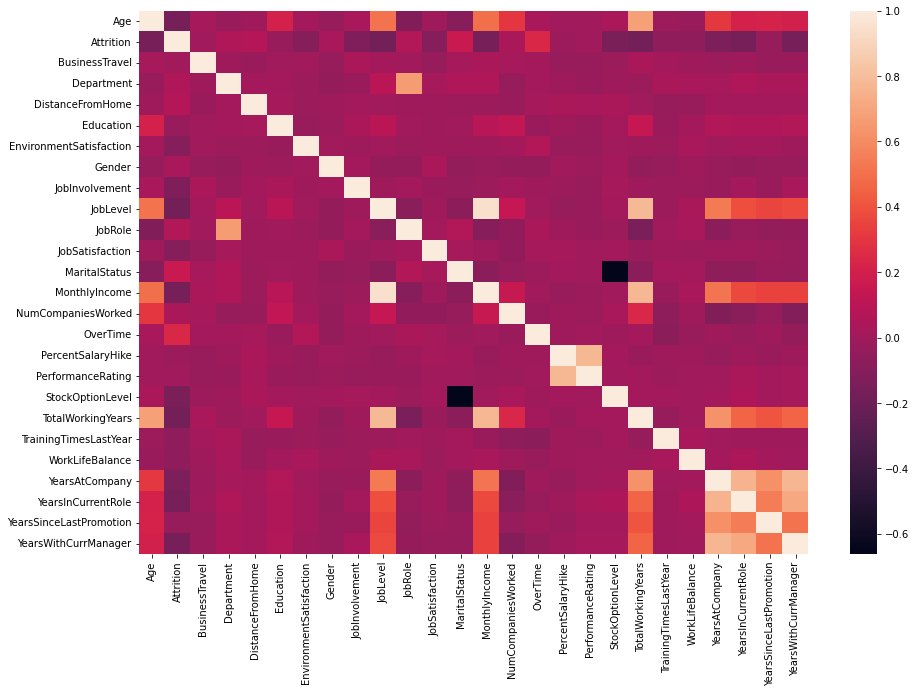

In [ ]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(data_correlation,xticklabels=data_correlation.columns,yticklabels=data_correlation.columns)

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

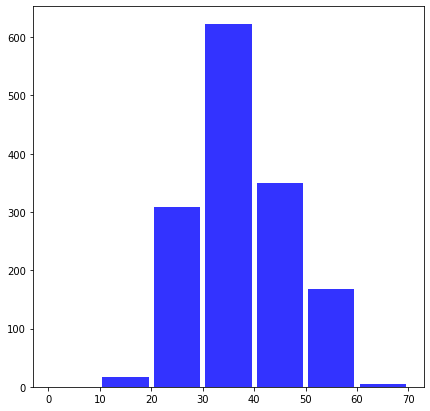

In [ ]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

In [ ]:
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

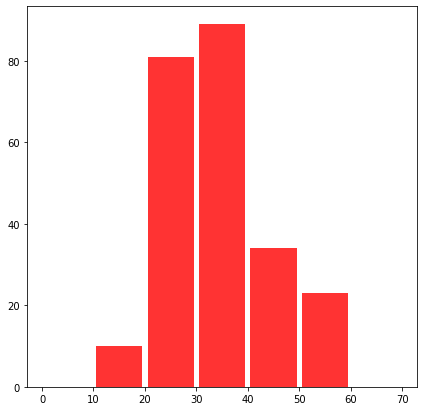

In [ ]:
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

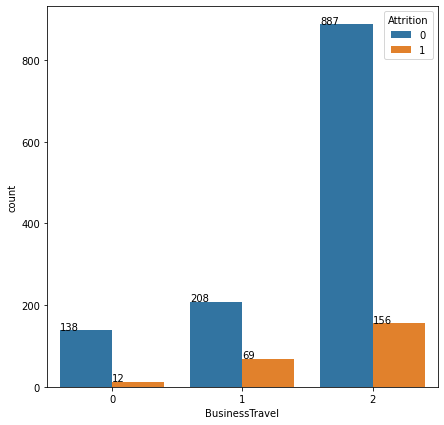

In [ ]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

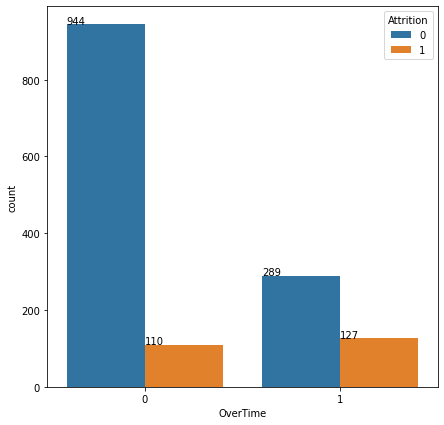

In [ ]:
ax = sns.countplot(x="OverTime", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

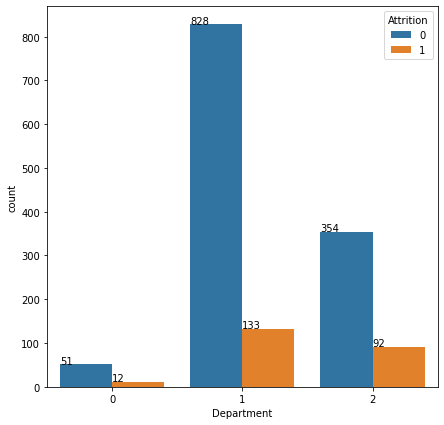

In [ ]:
ax = sns.countplot(x="Department", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

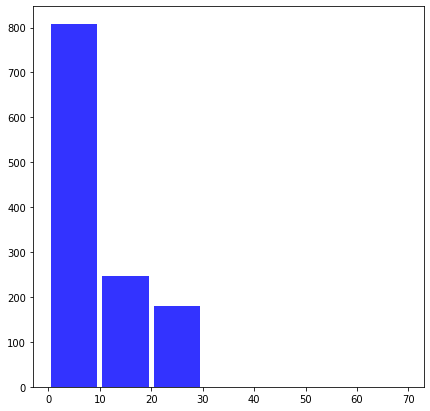

In [ ]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

(array([133.,  55.,  49.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

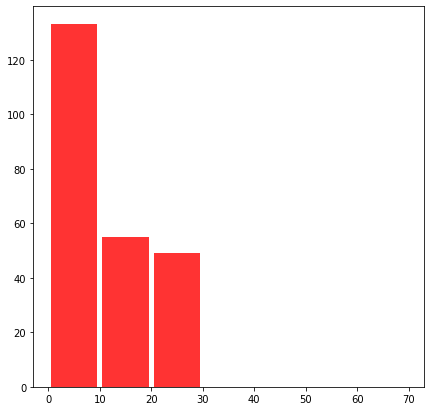

In [ ]:
plt.hist(positive_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

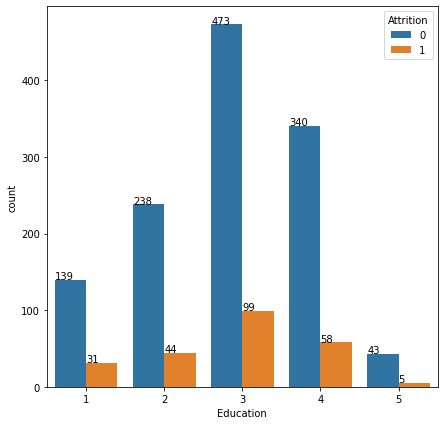

In [ ]:
ax = sns.countplot(x="Education", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

In [ ]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [ ]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [ ]:
df_age

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


In [ ]:
output_notebook() 


Gender_Attrition = df_age['Gender-attrition'].tolist()
count = df_age['count'].tolist()

print(count)


source = ColumnDataSource(data=dict(Gender_Attrition=Gender_Attrition, count=count, color=Viridis5))

plot_bar = figure(x_range=Gender_Attrition, plot_height=350, title="Counts")


plot_bar.vbar(x='Gender_Attrition', top='count', width=0.9, color='color', source=source)
show(plot_bar)

[501, 87, 732, 150]


In [ ]:
df_jrole = pd.DataFrame({'count': data_encoded.groupby(["JobRole", "Attrition"]).size()}).reset_index()

In [ ]:
df_jrole_1 = df_jrole.loc[df_jrole['Attrition'] == 1]

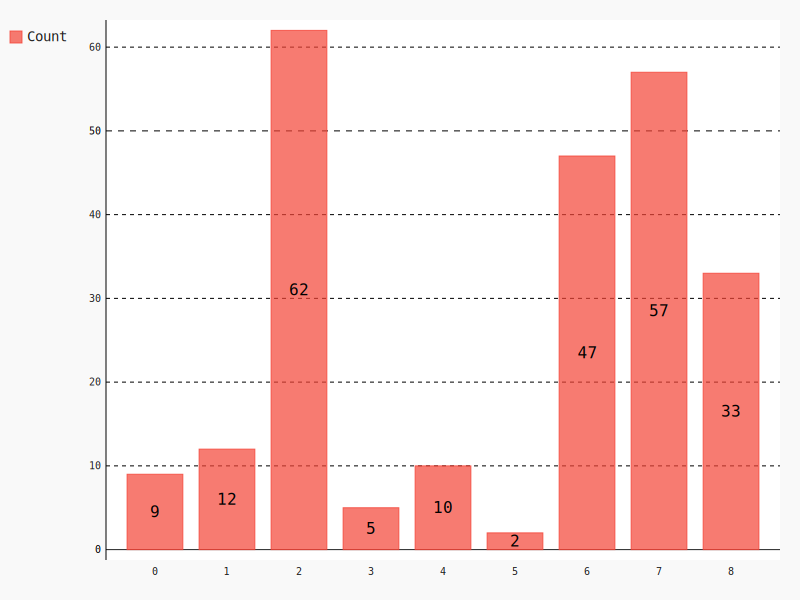

In [ ]:
import pygal
chart = pygal.Bar(print_values=True)
chart.x_labels = map(str, range(0,9))
chart.add('Count', df_jrole_1['count'])
display(SVG(chart.render(disable_xml_declaration=True)))

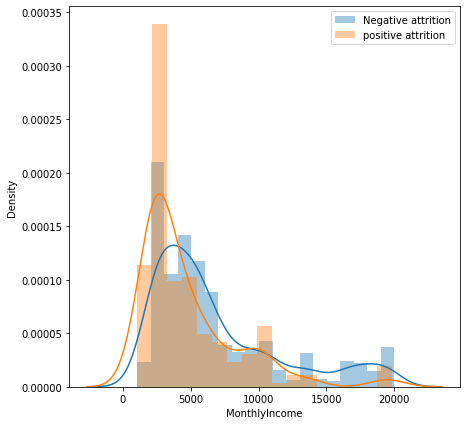

In [ ]:
sns.distplot(negative_attrition_df['MonthlyIncome'], label='Negative attrition')
sns.distplot(positive_attrition_df['MonthlyIncome'], label='positive attrition')
plt.legend()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

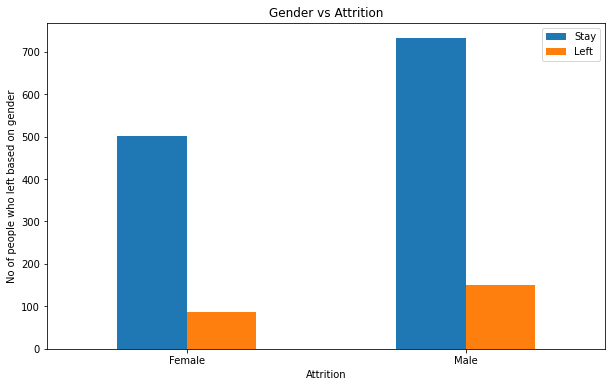

In [ ]:
pd.crosstab(df_data['Gender'],df_data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Gender vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

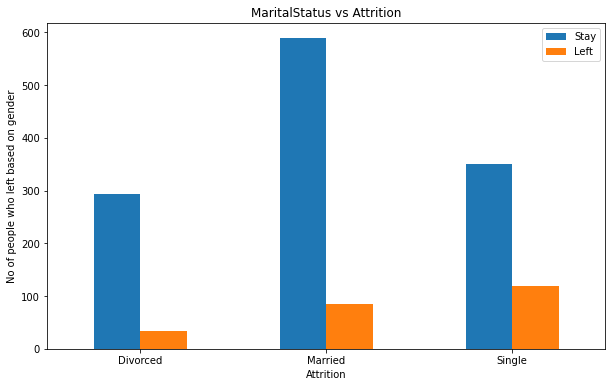

In [ ]:
pd.crosstab(df_data['MaritalStatus'],df_data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("MaritalStatus vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

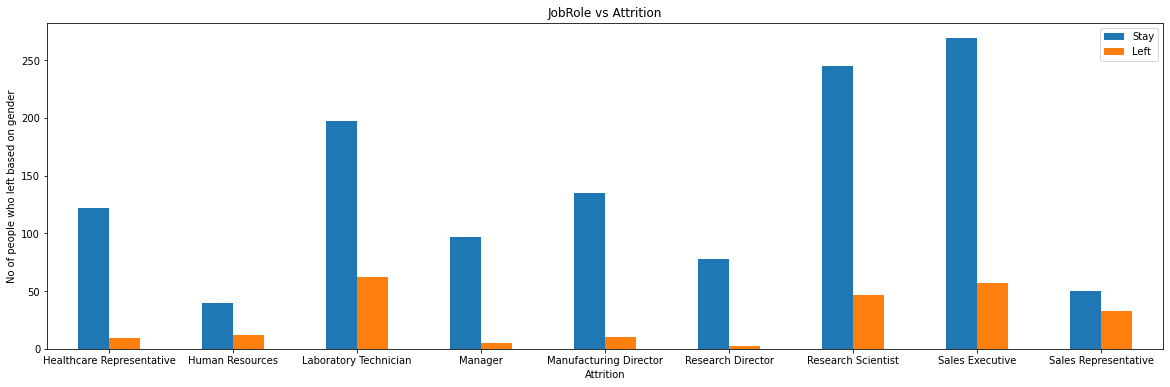

In [ ]:
pd.crosstab(df_data['JobRole'],df_data['Attrition']).plot(kind="bar",figsize=(20,6))
plt.title("JobRole vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

In [ ]:
import os
import matplotlib.pyplot as plt 

In [ ]:
attrition_count = pd.DataFrame(df_data['Attrition'].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x7f58b487cad0>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

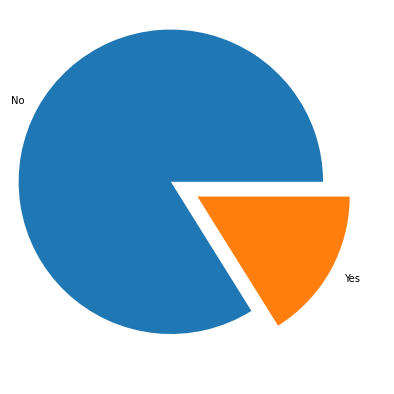

In [ ]:
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))

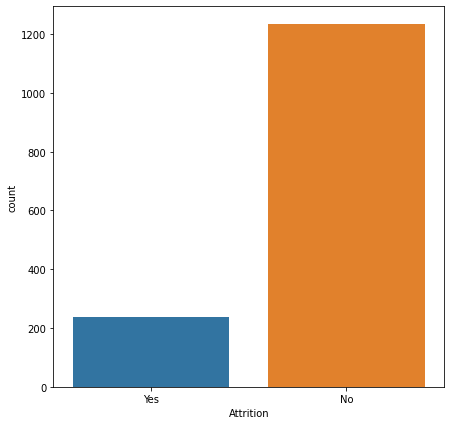

In [ ]:
sns.countplot(df_data['Attrition'])

## Converting Strings To Integers

In [ ]:
attrition_dummies = pd.get_dummies(df_data['Attrition'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
df_data = pd.concat([df_data, attrition_dummies] , axis = 1)
df_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,Sales,1,2,2,Female,3,2,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,Research & Development,8,1,3,Male,2,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,Research & Development,2,2,4,Male,2,1,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,4,Female,3,1,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,Research & Development,2,1,1,Male,3,1,...,1,6,3,3,2,2,2,2,1,0


In [ ]:
df_data = df_data.drop(['Attrition' , 'No'] , axis = 1)
df_data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,Sales,1,2,2,Female,3,2,Sales Executive,...,3,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,Research & Development,8,1,3,Male,2,2,Research Scientist,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,Research & Development,2,2,4,Male,2,1,Laboratory Technician,...,3,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,Research & Development,3,4,4,Female,3,1,Research Scientist,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,Research & Development,2,1,1,Male,3,1,Laboratory Technician,...,3,1,6,3,3,2,2,2,2,0


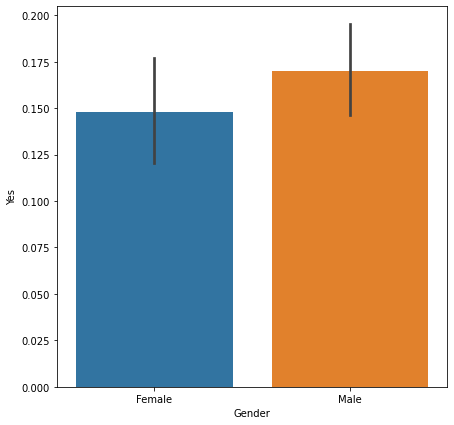

In [ ]:
sns.barplot(x = 'Gender' , y = 'Yes', data = df_data)

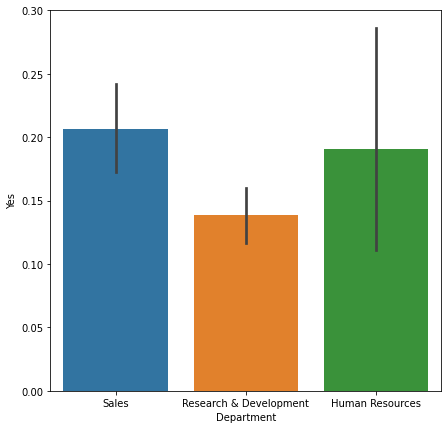

In [ ]:
sns.barplot(x = 'Department', y = 'Yes', data = df_data)

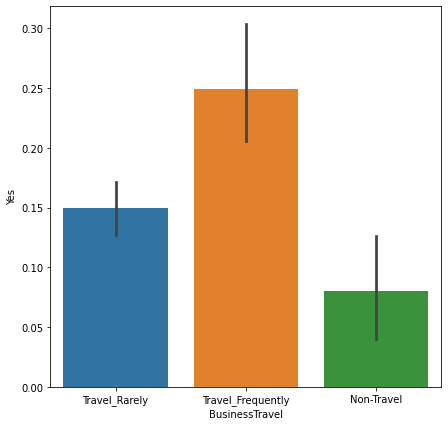

In [ ]:
sns.barplot(x = 'BusinessTravel', y = 'Yes', data = df_data)

In [ ]:
df_data.groupby('Department')['Yes'].agg(np.mean).sort_values(ascending=False)

Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Yes, dtype: float64

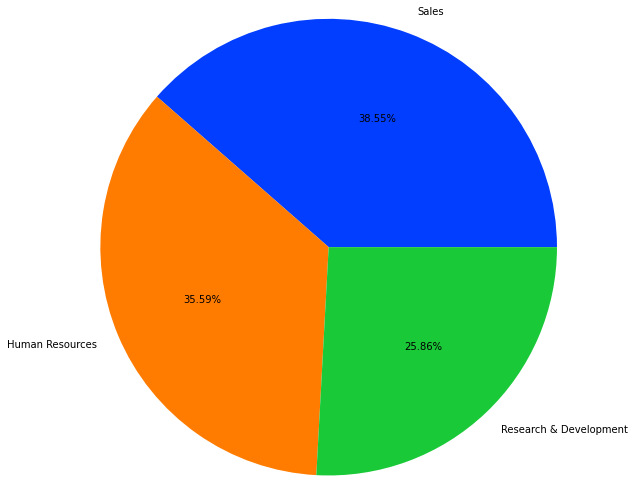

In [ ]:
exp_val=[0.206278/0.535144,0.190476/0.535144,0.138398/0.535144]
exp_label=['Sales','Human Resources','Research & Development']
palette_color = sns.color_palette('bright')
plt.pie(exp_val,labels=exp_label,radius=1.5,colors=palette_color,autopct='%0.2f%%');

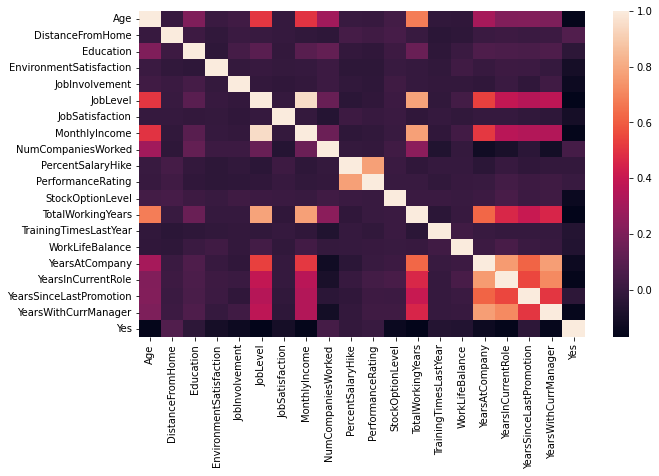

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(df_data.corr())

## Data Preprocessing

In [ ]:
df_data = df_data.drop(['Age' , 'JobLevel'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df_data.columns:
    if df_data[column].dtype==np.number:
        continue
    else:
        df_data[column]=LabelEncoder().fit_transform(df_data[column])

## Splitting the dataset into test and train data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
x  = df_data.drop(['Yes'], axis = 1)
y = df_data['Yes']

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
x_train.head()

,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
338,2,2,4,2,3,0,1,7,2,0,...,2,0,3,10,2,2,10,9,1,2
363,2,2,4,2,3,0,2,8,2,2,...,2,0,0,1,2,2,1,0,0,0
759,2,0,23,3,1,1,2,1,1,2,...,5,0,0,6,3,2,6,3,0,4
793,2,1,14,1,0,1,2,2,2,0,...,5,0,1,4,5,1,4,2,2,2
581,2,1,0,2,3,1,0,2,2,1,...,10,1,2,7,2,2,2,2,0,2


## Training the model

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
rf.score(x_train, y_train)

0.9844509232264335

## Testing the model

In [ ]:
pred = rf.predict(x_test)

## Accuracy Calculation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)

0.854875283446712